# 1. Entropy drift and its relation to sampling from the tail

Here, we average the entropy rate behavior over 100 contexts for 5 different sizes.

In [1]:
import os
import sys
sys.path.append('../examples')
sys.path.append('../jobs')
sys.path.append('../training_data')

from tqdm import trange

import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from generate_with_entropy import sample_sequence

import logging
logging.getLogger('transformers.tokenization_utils').setLevel(logging.ERROR)

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [2]:
# setup cell

def set_seed(seed=42, n_gpu=0):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(args.seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpus = torch.cuda.device_count()

set_seed()
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.to(device)
model.eval()

vocab_size = tokenizer.vocab_size

12/27/2019 23:09:19 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /u/myhu/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.085d5f6a8e7812ea05ff0e6ed0645ab2e75d80387ad55c1ad9806ee70d272f80
12/27/2019 23:09:19 - INFO - transformers.configuration_utils -   Model config {
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "initializer_range": 0.02,
  "is_decoder": false,
  "layer_norm_epsilon": 1e-05,
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "num_labels": 1,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pruned_heads": {},
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "torchscript": false,
  "use_bf

In [3]:
# generation, no truncation

file = '../training_data/gbw/test/100_lines.txt'
length = 100

In [ ]:
# full gen, take 2
# dropping the batch size, automating composition of losses. Suppress ranges -- too noisy. just print the seed
starting_seed 
for i in 

In [ ]:
# full
k = 0

set_seed(42)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1
            
set_seed(43)
with torch.no_grad():
    avg_ents_2 = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents_2 = (avg_ents_2 * i + ents) / (i + 1)
            i += 1
avg_ents_full = (avg_ents + avg_ents_2) / 2

In [6]:
save_ents = np.zeros((5, length))
save_ents[0, :] = avg_ents_full.cpu().numpy()[0]

In [4]:
save_ents = np.load('cache_2.npz')['save_ents']

In [5]:
# truncation 1024
# if this blows again, move everything to cpu
k = 1024

set_seed(44)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1
            
set_seed(45)
with torch.no_grad():
    avg_ents_2 = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents_2 = (avg_ents_2 * i + ents) / (i + 1)
            i += 1
avg_ents_full = (avg_ents + avg_ents_2) / 2

 61%|██████    | 61/100 [00:12<00:10,  3.70it/s]

RuntimeError: CUDA out of memory. Tried to allocate 1.69 GiB (GPU 0; 10.73 GiB total capacity; 3.48 GiB already allocated; 1.23 GiB free; 5.21 GiB cached)

In [8]:
save_ents[1, :] = avg_ents_full.cpu().numpy()[0]

In [15]:
np.savez('cache_2', save_ents=save_ents)

In [10]:
save_ents

array([[4.31185961, 3.33693194, 4.51721382, 4.22746181, 4.07652855,
        4.07654572, 4.04933262, 4.04203129, 4.00703049, 3.97483397,
        3.97299147, 3.96232939, 3.99413157, 3.95494509, 3.97300959,
        3.97650099, 3.97336912, 3.95903397, 3.97290516, 3.96873665,
        3.98324966, 3.92144108, 3.97007489, 3.9660418 , 3.96652889,
        3.95652509, 3.96278381, 3.94177628, 3.95645809, 3.96886253,
        3.9962821 , 3.93985796, 3.94768047, 3.97047234, 3.95450139,
        3.94990396, 3.97080922, 3.98713636, 3.96415949, 3.96079278,
        3.93567324, 3.96100235, 3.93544364, 3.95689464, 3.94926214,
        3.96196365, 3.98505688, 3.95744181, 3.99474478, 3.97846699,
        3.99450397, 3.97286654, 3.99450493, 4.00023222, 3.98600578,
        3.97383022, 3.97979736, 3.97337055, 3.97175241, 3.98878384,
        3.99025631, 3.98030376, 4.00924206, 4.003932  , 3.97941422,
        4.00699949, 4.00141287, 3.99224854, 3.97768927, 3.95859337,
        3.98908472, 3.99326324, 4.01350594, 3.99

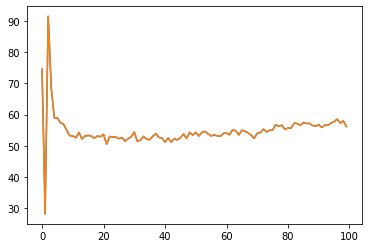

In [9]:
plt.plot(np.exp(save_ents[0, :]), label='full')
plt.plot(np.exp(save_ents[1, :]), label='top 1024')

In [5]:
# truncation 512
k = 512

set_seed(46)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1
            
set_seed(47)
with torch.no_grad():
    avg_ents_2 = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents_2 = (avg_ents_2 * i + ents) / (i + 1)
            i += 1
avg_ents_full = (avg_ents + avg_ents_2) / 2

 61%|██████    | 61/100 [00:12<00:10,  3.70it/s]

RuntimeError: CUDA out of memory. Tried to allocate 1.69 GiB (GPU 0; 10.73 GiB total capacity; 3.48 GiB already allocated; 1.23 GiB free; 5.21 GiB cached)

In [10]:
save_ents[2, :] = avg_ents_full.cpu().numpy()[0]

In [ ]:
# truncation 256
k = 256

set_seed(48)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1
            
set_seed(49)
with torch.no_grad():
    avg_ents_2 = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents_2 = (avg_ents_2 * i + ents) / (i + 1)
            i += 1
avg_ents_full = (avg_ents + avg_ents_2) / 2

In [34]:
save_ents[3, :] = avg_ents_full.cpu().numpy()[0]

In [ ]:
# truncation 40
k = 40

set_seed(50)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1
            
set_seed(51)
with torch.no_grad():
    avg_ents_2 = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents_2 = (avg_ents_2 * i + ents) / (i + 1)
            i += 1
avg_ents_full = (avg_ents + avg_ents_2) / 2

In [29]:
save_ents[4, :] = avg_ents_full.cpu().numpy()[0]

In [35]:
np.savez('cache', save_ents=save_ents)

In [47]:
save_ents

array([[4.31185865, 3.33236933, 4.51656342, 4.23932171, 4.07820892,
        4.08146477, 4.04546261, 4.01670265, 4.0097208 , 3.95764828,
        3.96700048, 3.96233702, 3.999825  , 3.9500165 , 3.96659184,
        3.95824432, 3.96486354, 3.96121645, 3.96990204, 3.98448992,
        3.98572016, 3.91837978, 3.95293498, 3.9571619 , 3.96269131,
        3.95217609, 3.98786521, 3.94952822, 3.95374918, 3.97609973,
        4.00478458, 3.93583298, 3.94901752, 3.96420622, 3.94720221,
        3.96554565, 3.95400023, 3.99887729, 3.95861864, 3.94923186,
        3.93309951, 3.95949841, 3.92410254, 3.96769714, 3.94709086,
        3.9486022 , 3.98841047, 3.95967293, 3.99752092, 3.99116397,
        4.00409317, 3.99021268, 4.00709534, 4.02053404, 3.99199438,
        3.99055457, 4.00378275, 3.9806366 , 3.98483372, 3.99605775,
        4.00193501, 3.98569608, 4.00716686, 3.99144888, 3.98174953,
        3.98049283, 4.00566387, 4.01302671, 4.00155783, 3.97523928,
        3.97395897, 3.98791957, 4.037817  , 3.99

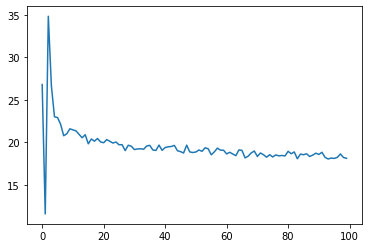

In [39]:
# is the spike at token 3 due to seed?
test = avg_ents_2.cpu().numpy()[0]
plt.plot(np.exp(test))

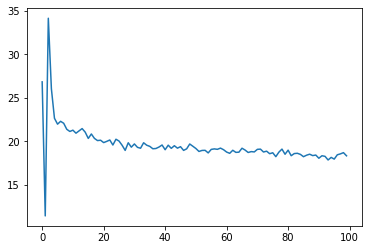

In [40]:
test2 = avg_ents_1024.cpu().numpy()[0]
plt.plot(np.exp(test2))

In [41]:
print(test)
print(test2)

[3.2890615 2.448075  3.5512667 3.282575  3.1362772 3.131874  3.0970018
 3.0337763 3.0447075 3.0724208 3.0665777 3.0611358 3.0416636 3.0223324
 3.0398152 2.9872012 3.0151012 3.0025945 3.0181506 2.997974  2.993466
 3.0116844 3.002051  2.9914355 2.9977002 2.9814599 2.9817784 2.9456542
 2.978479  2.9727113 2.9521844 2.9560492 2.956965  2.9542093 2.9736743
 2.9778924 2.9496984 2.9468133 2.9795265 2.9474938 2.9644809 2.9690976
 2.9708273 2.9774387 2.9451196 2.9393835 2.930925  2.9790938 2.9376845
 2.933906  2.9371293 2.9496536 2.9415317 2.9630945 2.9569516 2.919617
 2.9379032 2.9610512 2.9487572 2.94818   2.9251587 2.9352896 2.9245944
 2.9138744 2.9501283 2.9471145 2.8996098 2.9106438 2.9313838 2.9432144
 2.9088845 2.9309149 2.919671  2.9041305 2.9202266 2.9056451 2.91877
 2.9126318 2.9151573 2.9123068 2.9413085 2.926143  2.9376144 2.893996
 2.9238324 2.9199507 2.9260614 2.9085917 2.9174166 2.9297476 2.9216406
 2.9353564 2.9035187 2.8923929 2.8983662 2.896203  2.9028704 2.9249759
 2.9022892 

In [45]:
# additional experiment on whether due to seed

k = 0
length = 5

set_seed(351)
with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            _, ents = sample_sequence(
                model, 
                length, 
                context, 
                num_samples=64, 
                temperature=1, 
                top_k=k, top_p=0.0, is_xlnet=False, device=device)
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 5/5 [00:00<00:00, 27.19it/s]


[3.2890615 2.4563289 3.540543  3.2511313 3.1343658 3.1188073 3.119249
 3.083043  3.0901277 3.081588  3.047089  3.0372615 3.0582886 3.0379453
 3.0755467 3.0531359 3.035531  3.024779  3.0294914 2.9806075]


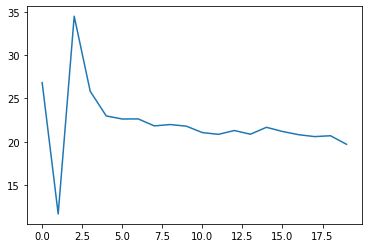

In [44]:
test3 = avg_ents.cpu().numpy()[0]
plt.plot(np.exp(test3))
print(test3)

[4.3118596 3.35388   4.536415  4.23078   4.062384 ]


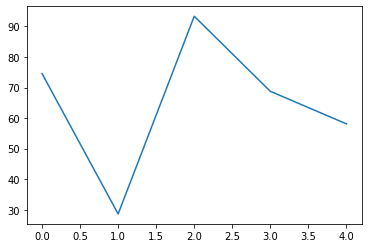

In [46]:
test4 = avg_ents.cpu().numpy()[0]
plt.plot(np.exp(test4))
print(test4)

Text(0.5, 1.0, 'Entropy blowup')

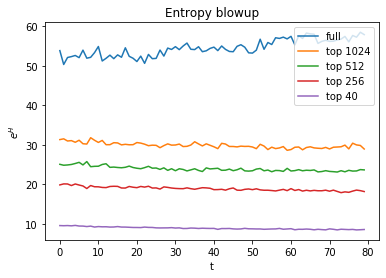

In [48]:
# why is there this weird spike at token 3 or so?

plt.plot(np.exp(save_ents[0, 20:]), label='full')
plt.plot(np.exp(save_ents[1, 20:]), label='top 1024')
plt.plot(np.exp(save_ents[2, 20:]), label='top 512')
plt.plot(np.exp(save_ents[3, 20:]), label='top 256')
plt.plot(np.exp(save_ents[4, 20:]), label='top 40')
plt.xlabel('t')
plt.ylabel('$e^H$')
plt.legend()
plt.title('Entropy blowup')

# 2. Assessing entropy increase over 100 successive generations 

In [16]:
delta_full = np.exp(save_ents[0, 99]) - np.exp(save_ents[0, 19])
delta_1024 = np.exp(save_ents[1, 99]) - np.exp(save_ents[1, 19])
delta_512 = np.exp(save_ents[2, 99]) - np.exp(save_ents[2, 19])
delta_256 = np.exp(save_ents[3, 99]) - np.exp(save_ents[3, 19])
delta_40 = np.exp(save_ents[4, 99]) - np.exp(save_ents[4, 19])

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

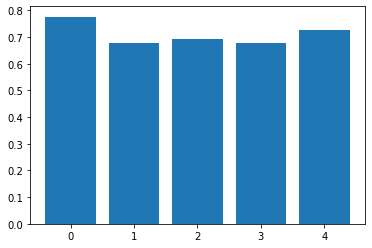

In [18]:
N = 5
ind = np.arange(N)
diff = (delta_full, delta_1024, delta_512, delta_256, delta_40)
plt.bar(ind, np.exp(diff))
plt.ylabel()
plt.xticks(ind, ('full', '1024', '512', '256', '40'))
plt.show()

In [19]:
diff

(-0.2537417411804199,
 -0.39038586616516113,
 -0.36838269233703613,
 -0.3868074417114258,
 -0.3209688663482666)